In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('dataset csv for supervised/Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
x=dataset.iloc[:,1:2].values

In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y=dataset.iloc[:,2:].values

In [8]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

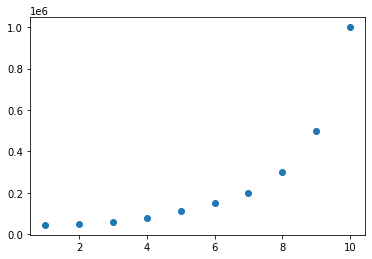

In [9]:
plt.scatter(x,y)

In [10]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly=PolynomialFeatures(degree=3)    # increase the degree for better curve to graph
# note : so to avoid overfitting exactly same 

In [13]:
x_poly=poly.fit_transform(x)

In [14]:
x_poly  # y=a0+a1x+a2x^2

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [15]:
x_poly.shape      #multilinear  regerssion

(10, 4)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
pr=LinearRegression()
pr.fit(x_poly,y)
# model is built by this x_poly


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred=pr.predict(x_poly)
y_pred

array([[ 14902.0979021 ],
       [ 78759.9067599 ],
       [ 94960.37296037],
       [ 88223.77622377],
       [ 83270.39627039],
       [104820.51282051],
       [177594.40559441],
       [326312.35431236],
       [575694.63869464],
       [950461.53846154]])

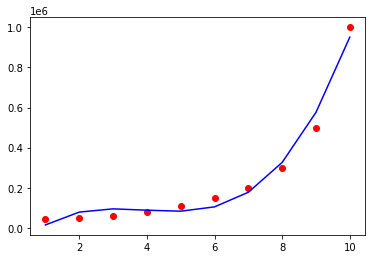

In [19]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()

In [22]:
pr.predict(poly.fit_transform([[11]]))

array([[1475333.33333332]])

In [24]:
pr.predict([[1,11,21,1331]])

array([[6330228.43822799]])

In [23]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9812097727913366